# DATA SCIENCE FROM SCRATCH

By: Yaneth Ccahuantico Mendoza

## CAPÍTULO N° 24. Mapreduce

The future has already arrived. It’s just not evenly distributed yet.
William Gibson
MapReduce is a programming model for performing parallel processing on large data sets.
Although it is a powerful technique, its basics are relatively simple.
Imagine we have a collection of items we’d like to process somehow. For instance, the
items might be website logs, the texts of various books, image files, or anything else. A
basic version of the MapReduce algorithm consists of the following steps:
1. Use a mapper function to turn each item into zero or more key-value pairs. (Often
this is called the map function, but there is already a Python function called map and
we don’t need to confuse the two.)
2. Collect together all the pairs with identical keys.
3. Use a reducer function on each collection of grouped values to produce output
values for the corresponding key.
This is all sort of abstract, so let’s look at a specific example. There are few absolute rules
of data science, but one of them is that your first MapReduce example has to involve
counting words

# Contador de palabras

In [9]:
from collections import Counter
from tokenize import tokenize

In [12]:
def word_count_old(documents):
 """word count not using MapReduce"""
 return Counter(word
                for document in documents
                for word in tokenize(document))

In [34]:
def wc_mapper(documents):
    for word in tokenize(documents):
        yield (word, 1)
        
#    """for each word in the document, emit (word,1)"""

In [10]:
wc_mapper(documents)

<generator object wc_mapper at 0x00000262C6819A98>

In [35]:
def wc_reducer(word, counts):
    yield (word, sum(counts))
# """sum up the counts for a word"""


In [22]:
from collections import defaultdict

In [36]:
# Let’s think about how we would do this on just one computer:

def word_count(documents):
# """count the words in the input documents using MapReduce"""

 # place to store grouped values
    collector = defaultdict(list)
    
    for document in documents:
        for word, count in wc_mapper(document):
            collector[word].append(count)
    
    return [output
            for word, counts in collector.iteritems()
            for output in wc_reducer(word, counts)]

# MapReduce más generalmente

In [2]:
def map_reduce(inputs, mapper, reducer):
# """runs MapReduce on the inputs using mapper and reducer"""
    collector = defaultdict(list)

    for inpu in inputs:
        for key, value in mapper(input):
            collector[key].append(value)
        
    return [output
            for key, values in collector.iteritems()
            for output in reducer(key,values)]


In [48]:
#And then we can count words simply by using:
    
word_counts = map_reduce(documents, wc_mapper, wc_reducer)

hola


KeyboardInterrupt: 

In [52]:
from functools import partial 

In [53]:
def reduce_values_using(aggregation_fn, key, values):
 """reduces a key-values pair by applying aggregation_fn to the values"""
     yield (key, aggregation_fn(values))

def values_reducer(aggregation_fn):
 """turns a function (values -> output) into a reducer
 that maps (key, values) -> (key, output)"""
     return partial(reduce_values_using, aggregation_fn)
 


IndentationError: unexpected indent (<ipython-input-53-cb9d2c583cf9>, line 3)

In [55]:
sum_reducer = values_reducer(sum)
max_reducer = values_reducer(max)
min_reducer = values_reducer(min)
count_distinct_reducer = values_reducer(lambda values: len(set(values)))
print(sum_reducer)

functools.partial(<function reduce_values_using at 0x00000262C68672F0>, <built-in function sum>)


# Análisis de actualizaciones de estado

In [4]:
def data_science_day_mapper(status_update):
 """yields (day_of_week, 1) if status_update contains "data science" """
 if "data science" in status_update["text"].lower():
        day_of_week = status_update["created_at"].weekday()
        yield (day_of_week, 1)



In [5]:
# And then we can count words simply by using:

data_science_days = map_reduce(status_updates,
                               data_science_day_mapper,sum_reducer)

NameError: name 'status_updates' is not defined

In [10]:
def words_per_user_mapper(status_update):
    user = status_update["username"]
    for word in tokenize(status_update["text"]):
        yield (user, (word, 1))

def most_popular_word_reducer(user, words_and_counts):
 """given a sequence of (word, count) pairs,
 return the word with the highest total count"""
 
    word_counts = Counter()
    for word, count in words_and_counts:
        word_counts[word] += count
        
    word, count = word_counts.most_common(1)[0]
    
    yield (user, (word, count))
    
    user_words = map_reduce(status_updates,words_per_user_mapper,most_popular_word_reducer)



IndentationError: unexpected indent (<ipython-input-10-fff81d59ce01>, line 10)

In [11]:
# Or we could find out the number of distinct status-likers for each user:

def liker_mapper(status_update):
    user = status_update["username"]
    for liker in status_update["liked_by"]:
        yield (user, liker)

distinct_likers_per_user = map_reduce(status_updates,liker_mapper,count_distinct_reducer)

NameError: name 'status_updates' is not defined

# Multiplicación de Matrices

In [12]:
from IPython.display import Image

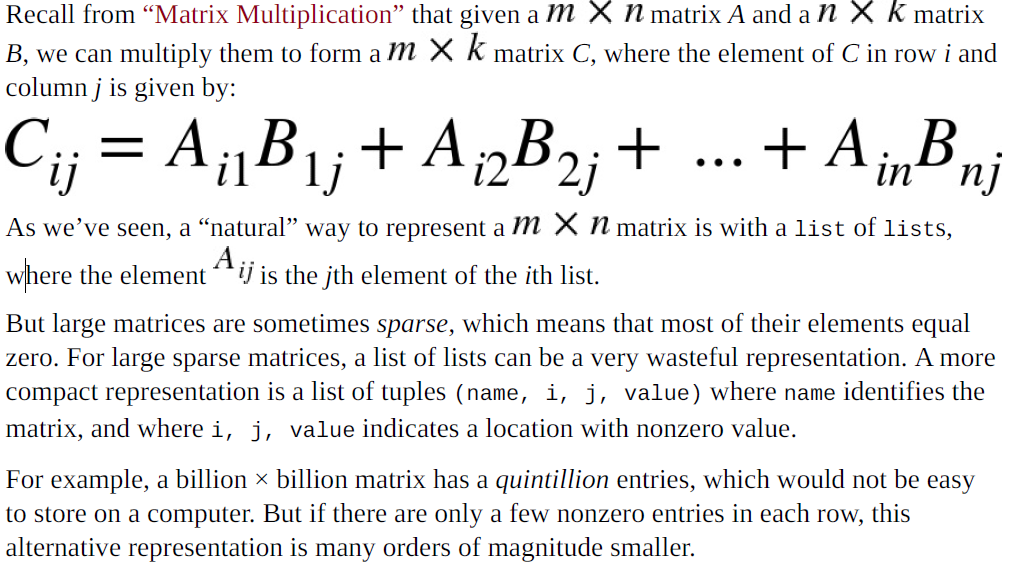

In [13]:
Image(filename="C:/Users/Yaneth/Desktop/Data/Big Data - Analytics/Python Data Science from Scratch/Imagenes/Matriz.png")

In [14]:
def matrix_multiply_mapper(m, element):
    
 """m is the common dimension (columns of A, rows of B)
 element is a tuple (matrix_name, i, j, value)"""
    name, i, j, value = element
    
    if name == "A":
         # A_ij is the jth entry in the sum for each C_ik, k=1..m
         for k in range(m):
             # group with other entries for C_ik
             yield((i, k), (j, value))
    else:
     # B_ij is the i-th entry in the sum for each C_kj
         for k in range(m):
             # group with other entries for C_kj
             yield((k, j), (i, value))



IndentationError: unexpected indent (<ipython-input-14-512e197416db>, line 5)

In [15]:
def matrix_multiply_reducer(m, key, indexed_values):
    results_by_index = defaultdict(list)
    for index, value in indexed_values:
        results_by_index[index].append(value)
        
 # sum up all the products of the positions with two results
    sum_product = sum(results[0] * results[1]
                   for results in results_by_index.values()
                   if len(results) == 2)
    if sum_product != 0.0:
        yield (key, sum_product)

In [16]:
A = [[3, 2, 0],
     [0, 0, 0]]

B = [[4, -1, 0],
     [10, 0, 0],
     [0, 0, 0]]

print(A, B)

[[3, 2, 0], [0, 0, 0]] [[4, -1, 0], [10, 0, 0], [0, 0, 0]]


In [17]:
# you could rewrite them as tuples:

entries = [("A", 0, 0, 3), ("A", 0, 1, 2),
 ("B", 0, 0, 4), ("B", 0, 1, -1), ("B", 1, 0, 10)]
mapper = partial(matrix_multiply_mapper, 3)

reducer = partial(matrix_multiply_reducer, 3)

map_reduce(entries, mapper, reducer) # [((0, 1), -3), ((0, 0), 32)]

NameError: name 'partial' is not defined